# Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
1. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
1. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
1. Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
1. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
1. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.
1. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
1. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [29]:
import numpy as np
import math
import pylab
import matplotlib.pyplot as plt

In [30]:
# Описание исходной функции f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
def func(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

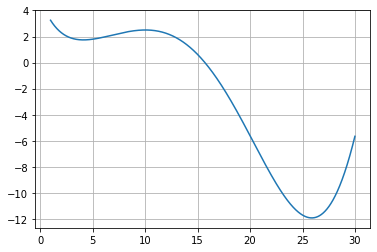

In [31]:
# Создадим область определения и отрисуем функцию
x_min = 1
x_max = 30
dx = 0.01

# Создадим список координат
x_list = np.arange(x_min, x_max, dx)
y_list = [func(x) for x in x_list]

# Нарисуем график
plt.plot(x_list, y_list)

# Покажем окно с нарисованным графиком
plt.grid(True)
plt.show()

In [32]:
from scipy.optimize import minimize

min1_x0 = range(30)
min1_x_list = list()
min1_y_list = list()
for x0 in min1_x0:
    m = minimize(func, x0)
    print(m.x, m.fun, m.success, m.nfev, m.nit)
    if (m.x <= 30) & (m.success == True):
        min1_x_list.append(x0)
        min1_y_list.append(m.fun)

[4.13628824] 1.7452682903319903 True 18 8
[4.13628697] 1.745268290332218 True 16 7
[4.13627628] 1.7452682903447336 True 14 6
[4.13623323] 1.7452682905867012 True 12 5
[4.13625735] 1.7452682904133416 True 10 4
[4.13628832] 1.745268290331984 True 14 6
[4.13628982] 1.7452682903320773 True 16 5
[4.13628939] 1.7452682903320125 True 20 5
[4.13628868] 1.7452682903319725 True 18 5
[4.13630225] 1.7452682903471772 True 22 4
[4.13630023] 1.7452682903429801 True 26 3
[25.88019285] -11.898894665981311 True 42 2
[25.88019172] -11.898894665980812 True 24 4
[88.71203605] -6371.765229165741 True 50 4
[25.88019315] -11.898894665981317 True 16 2
[24.67766109] -11.503580757136064 False 44 1
[25.88019877] -11.898894665971541 True 16 2
[25.88017663] -11.898894665901345 True 22 6
[25.88019851] -11.8988946659724 True 18 6
[25.88017637] -11.898894665898753 True 16 5
[25.88018742] -11.898894665971952 True 14 4
[25.88020587] -11.898894665932263 True 14 5
[25.88019422] -11.898894665980901 True 14 6
[25.88019285] 

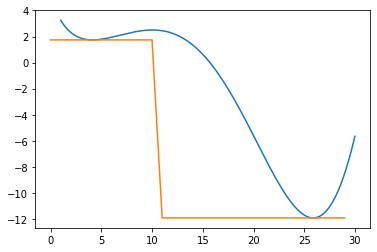

In [33]:
plt.plot(x_list, y_list, min1_x_list, min1_y_list)
plt.show()

Укажем в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации) и начальное приближение x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой


In [34]:
min2_x0 = 2
min_1 = minimize(func, min2_x0, method='BFGS')
ans1 = round(min_1.fun, 2)
print("Answer1=", ans1)

Answer1= 1.75


In [35]:
min3_x0 = 30
min_2 = minimize(func, min3_x0, method='BFGS')
ans2 = round(min_2.fun, 2)
print("Answer2=", ans2)

Answer2= -11.9


In [36]:
answer = '{} {}'.format(ans1, ans2)
with open('3.2hw.txt', 'w') as output_file:
  output_file.write(answer)
answer

'1.75 -11.9'